In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train , y_train),(x_test , y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4649 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9253


In [19]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.9240


[0.271676242351532, 0.9240000247955322]

In [23]:
y_pred=model.predict(x_test_flatten)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.9244449e-02, 5.4654419e-07, 5.1050592e-02, 9.7005564e-01,
       4.2966534e-03, 1.6145028e-01, 1.3846250e-06, 9.9982268e-01,
       1.1028896e-01, 7.1918023e-01], dtype=float32)

In [25]:
np.argmax(y_pred[5])

1

In [26]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    2,    0,    5,   10,    2,    3,    1],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   5,   11,  891,   30,    7,    5,   13,   10,   55,    5],
       [   1,    0,   10,  940,    0,   17,    2,   10,   22,    8],
       [   1,    1,    3,    1,  907,    0,   13,    3,   10,   43],
       [   8,    3,    1,   42,    8,  768,   14,    6,   36,    6],
       [   7,    3,    3,    2,    7,   11,  921,    2,    2,    0],
       [   1,    8,   17,   12,    9,    1,    0,  935,    2,   43],
       [   6,   12,    5,   20,    9,   26,    9,    7,  871,    9],
       [   8,    8,    1,   10,   22,    7,    1,   13,    7,  932]])>

<Axes: >

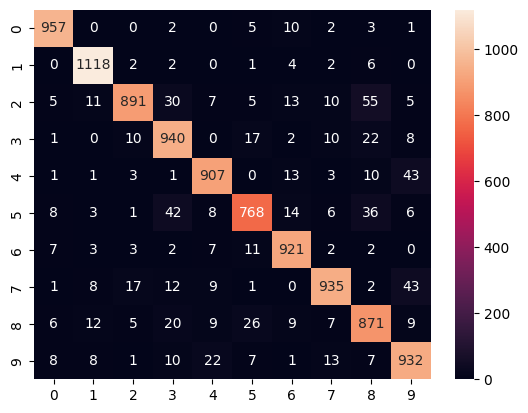

In [29]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

In [30]:
model=keras.Sequential([
    keras.layers.Dense(100,activation='relu'),  #input layer
    keras.layers.Dense(10,activation='sigmoid')  #hidden layers
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2754 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0903 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0536 - accuracy: 0.9835


In [32]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9741


[0.0802217647433281, 0.9740999937057495]

313/313 [==============================] - 1s 2ms/step


<Axes: >

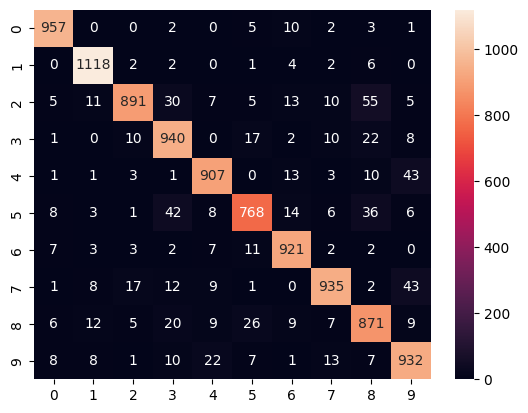

In [34]:
y_pred=model.predict(x_test_flatten)
cmn=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
sns.heatmap(cmn,annot=True,fmt='d')

In [35]:
# we dont have to creat a flatten variable
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28)),
    keras.layers.Dense(100,activation='relu'),  #input layer
    keras.layers.Dense(10,activation='sigmoid')  #hidden layers
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=5)


TypeError: 'int' object is not iterable